In [1]:
!pip install networkx

In [12]:
import numpy as np
import networkx as nx


num_people = 6

names = ['alex', 'ross', 'lauren', 'kayla']

people = {
    "alex": 0.75,
    "kayla": 0.6,
    "lauren": 0.9,
    "ross": 0.0
}

w = np.array(
    [[0.0, 1.0, 1.0, 0.0], [1.0, 0.0, 1.0, 1.0], [1.0, 1.0, 0.0, 1.0], [0.0, 1.0, 1.0, 0.0]]
)

G = nx.from_numpy_array(w)


Adjacency Matrix:
[[0.         0.86956522 0.86956522 0.57142857]
 [0.86956522 0.         0.76923077 0.625     ]
 [0.86956522 0.76923077 0.         0.52631579]
 [0.57142857 0.625      0.52631579 0.        ]]


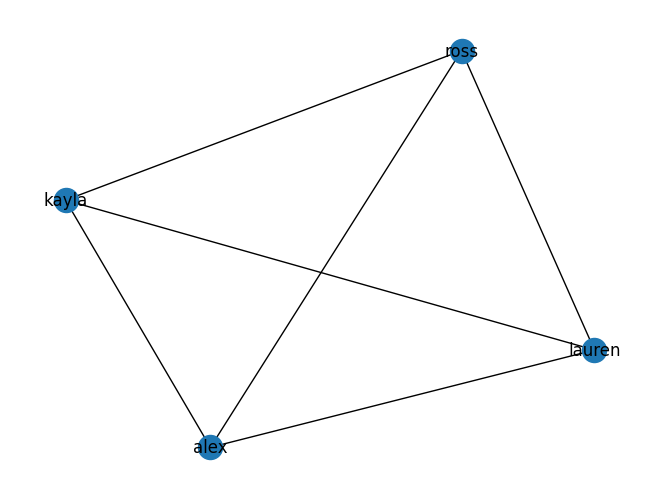

In [15]:
import numpy as np
import networkx as nx

# Define the people and their associated values
people = {
    "alex": 0.75,
    "kayla": 0.6,
    "lauren": 0.9,
    "ross": 0.0
}

# List the names to create a consistent order
people_list = list(people.keys())

# Create an empty adjacency matrix
n = len(people_list)
w = np.zeros((n, n))

# Define the function to calculate similarity which is what edges will be based on (inverse of absolute difference)
def calculate_similarity(val1, val2):
    return 1 / (1 + abs(val1 - val2))  # Example similarity function

# Populate the adjacency matrix
for i in range(n):
    for j in range(i + 1, n):  # Only upper triangle because adjacency matrix is symmetric
        val_i = people[people_list[i]]
        val_j = people[people_list[j]]
        similarity = calculate_similarity(val_i, val_j)
        w[i, j] = w[j, i] = similarity  # Since the graph is undirected

# Now you have the adjacency matrix 'w'
print("Adjacency Matrix:")
print(w)

# Create the graph using NetworkX
G = nx.from_numpy_array(w)

# Optionally, you can plot the graph to visualize it
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, labels={i: people_list[i] for i in range(len(people_list))})
plt.show()


In [17]:
num_nodes = len(people.keys())

num_nodes

4

In [18]:
def objective_value(x, w):
    """Compute the value of a cut.
    Args:
        x: Binary string as numpy array.
        w: Adjacency matrix.
    Returns:
        Value of the cut.
    """
    X = np.outer(x, (1 - x))
    w_01 = np.where(w != 0, 1, 0)
    return np.sum(w_01 * X)


def bitfield(n, L):
    result = np.binary_repr(n, L)
    return [int(digit) for digit in result]  # [2:] to chop off the "0b" part


# use the brute-force way to generate the oracle
L = num_nodes
max = 2**L
sol = np.inf
for i in range(max):
    cur = bitfield(i, L)

    how_many_nonzero = np.count_nonzero(cur)
    if how_many_nonzero * 2 != L:  # not balanced
        continue

    cur_v = objective_value(np.array(cur), w)
    if cur_v < sol:
        sol = cur_v

print(f"Objective value computed by the brute-force method is {sol}")

Objective value computed by the brute-force method is 4
